# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 17.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


# Google Drive connection

In [ ]:
#Execute the cell and follow the steps, it is necessary to connect with the user account in which the files are contained.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import skew


## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [ ]:
data = pd.read_csv('your path to file/NLSY97_subset.csv')
data_description = pd.read_csv('your path to file/NLSY97_Variable_Names_and_Descriptions.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

In [ ]:
data_description.shape

(122, 3)

In [ ]:
data_description.columns

Index(['Personal variables', 'Variable Type', 'Description'], dtype='object')

In [ ]:
# examine the data types
data_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Personal variables  107 non-null    object
 1   Variable Type       93 non-null     object
 2   Description         93 non-null     object
dtypes: object(3)
memory usage: 3.0+ KB


In [ ]:
data_description.head(20)

,Personal variables,Variable Type,Description
0,FEMALE,D,"Sex of respondent (0 if male, 1 if female)"
1,MALE,D,"Sex of respondent (1 if male, 0 if female)"
2,NaN,NaN,NaN
3,Ethnicity:,NaN,NaN
4,ETHBLACK,D,Black
5,ETHHISP,D,Hispanic
6,ETHWHITE,D,"Non-black, non-hispanic"
7,NaN,NaN,NaN
8,AGE,C,Age in 2011
9,BYEAR,C,Year of birth


# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
data.shape

(2000, 96)

In [ ]:
print(f"Dataframe Yearly has {data.shape[0]} rows and {data.shape[1]} columns")

Dataframe Yearly has 2000 rows and 96 columns


In [ ]:
data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [ ]:
# examine the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

In [ ]:
data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [ ]:
#info() allows us to see the count of non-null data in each column of the data frame. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

In [ ]:
# Are there any null or duplicate values?
print(f'Duplicated values in data?: {data.duplicated().values.any()}')
print(f'Missing values in data?: {data.isna().values.any()}')

data.fillna(0, inplace=True)
data.drop_duplicates(inplace=True)
print(f'Duplicated values in data?: {data.duplicated().values.any()}')
print(f'Missing values in data?: {data.isna().values.any()}')

Duplicated values in data?: True
Missing values in data?: True
Duplicated values in data?: False
Missing values in data?: False


## Descriptive Statistics

In [ ]:
# Using .describe() allows us to view some interesting statistics at a glance.
# Select keys columns of dataframe object, that included all rows, but only 'EARNINGS', 'S' and 'EXP' columns of the dataframe.
data[['EARNINGS', 'S', 'EXP']].describe()

,EARNINGS,S,EXP
count,"1,487.00","1,487.00","1,487.00"
mean,18.81,14.56,6.70
std,12.00,2.77,2.86
min,2.00,6.00,0.00
25%,11.41,12.00,4.65
50%,15.75,15.00,6.63
75%,22.60,16.00,8.71
max,132.89,20.00,14.73


## Visualise the Features
Let's visualize the distributions for our model. We will use Seaborn's .displot() to create a bar graph and overlay the kernel density estimate (KDE).

<Figure size 1152x288 with 0 Axes>

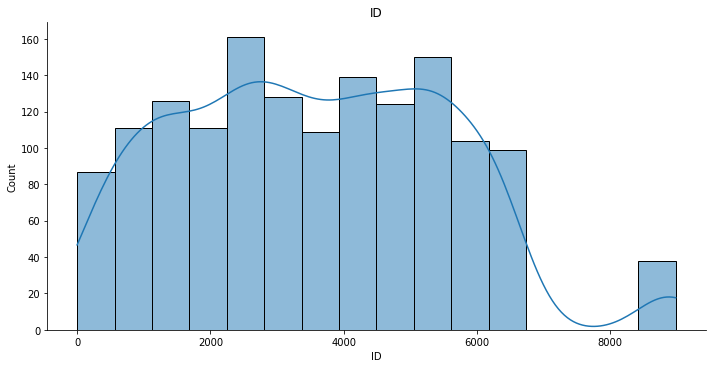

<Figure size 1152x288 with 0 Axes>

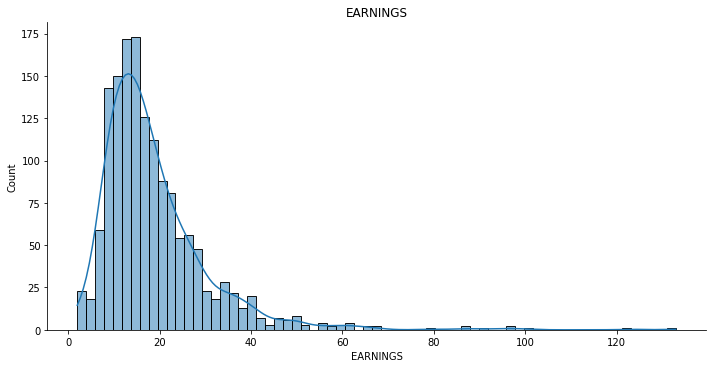

<Figure size 1152x288 with 0 Axes>

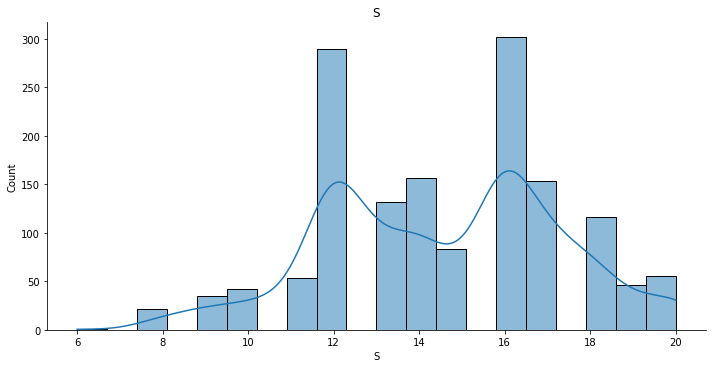

<Figure size 1152x288 with 0 Axes>

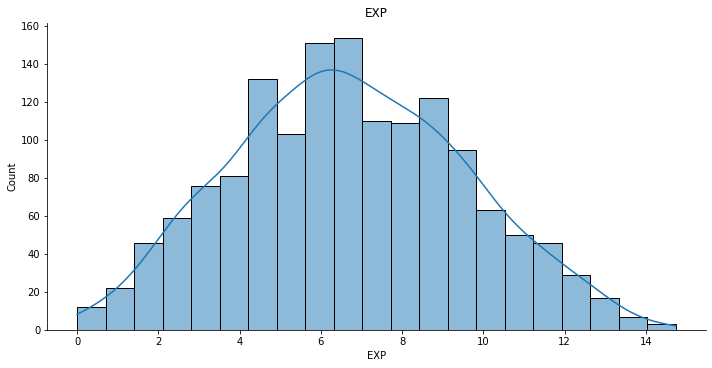

<Figure size 1152x288 with 0 Axes>

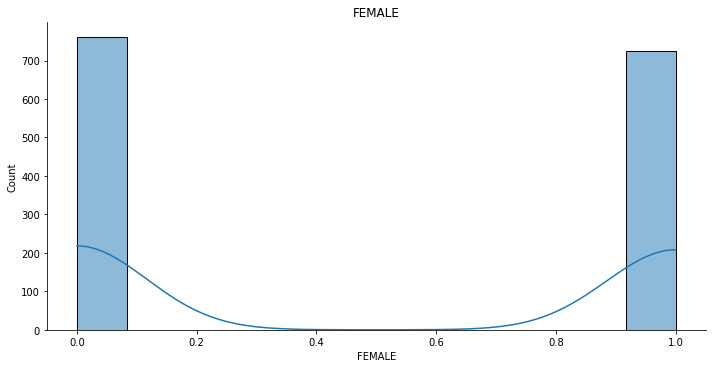

<Figure size 1152x288 with 0 Axes>

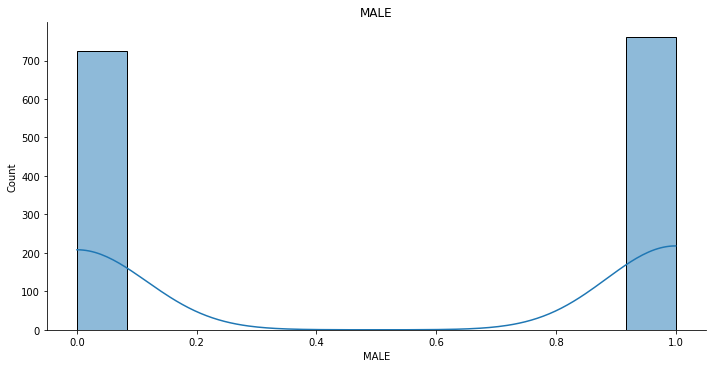

<Figure size 1152x288 with 0 Axes>

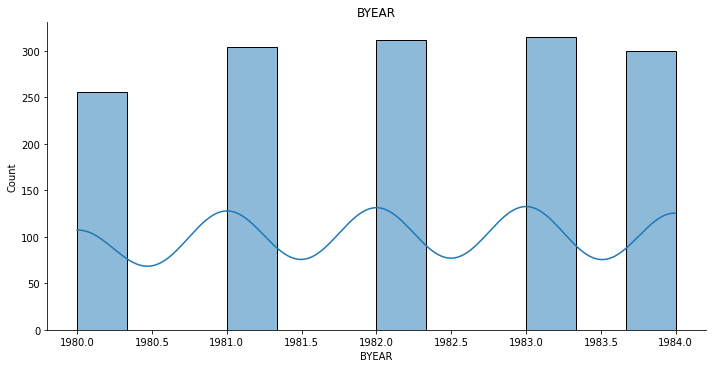

<Figure size 1152x288 with 0 Axes>

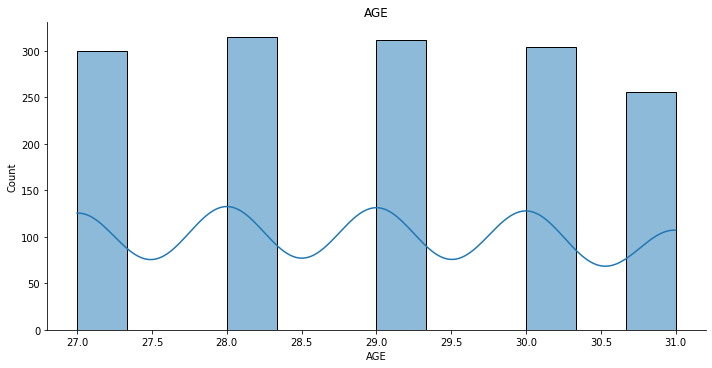

<Figure size 1152x288 with 0 Axes>

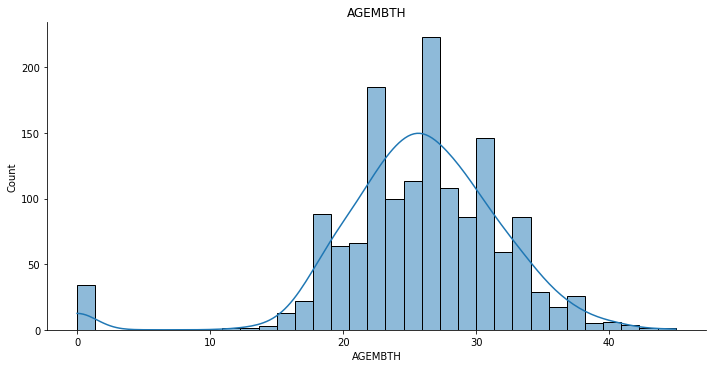

<Figure size 1152x288 with 0 Axes>

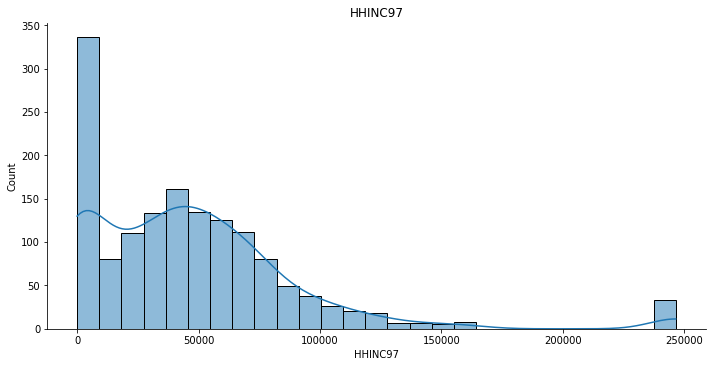

<Figure size 1152x288 with 0 Axes>

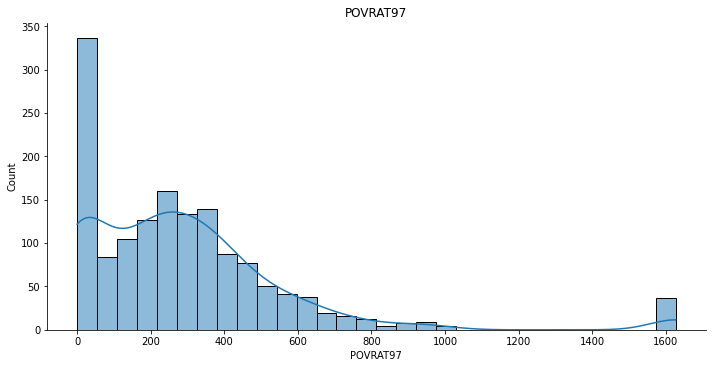

<Figure size 1152x288 with 0 Axes>

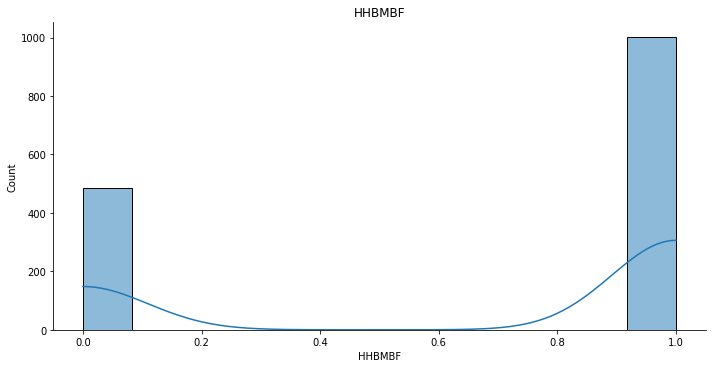

<Figure size 1152x288 with 0 Axes>

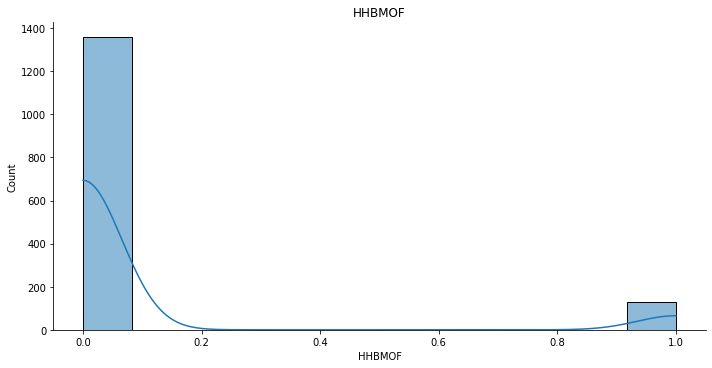

<Figure size 1152x288 with 0 Axes>

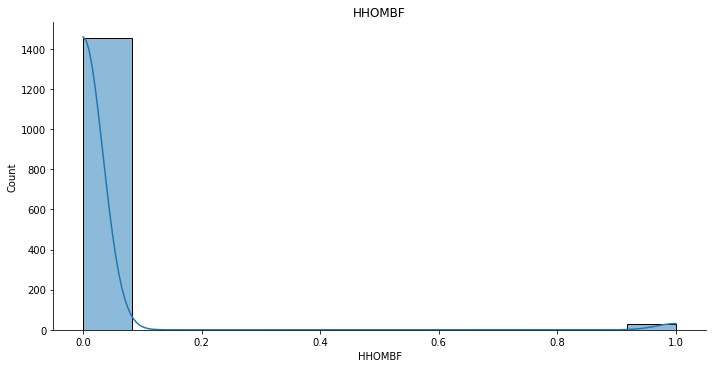

<Figure size 1152x288 with 0 Axes>

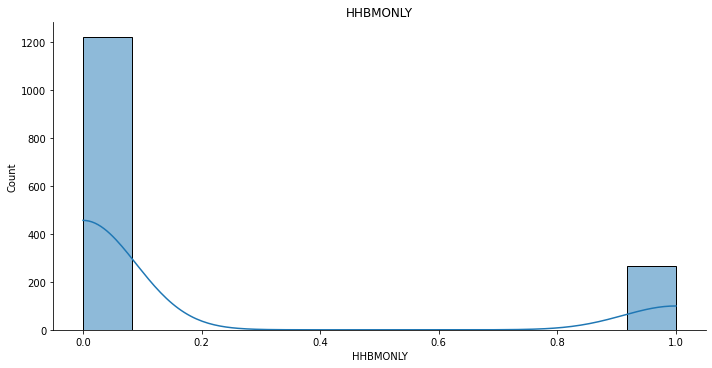

<Figure size 1152x288 with 0 Axes>

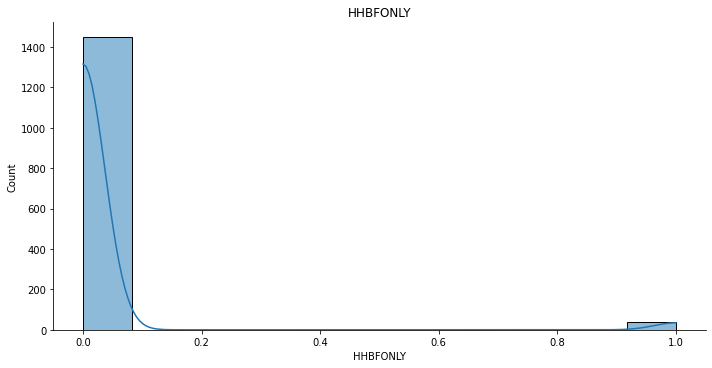

<Figure size 1152x288 with 0 Axes>

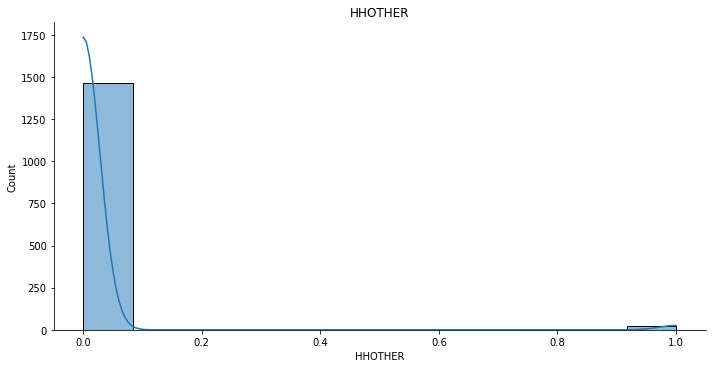

<Figure size 1152x288 with 0 Axes>

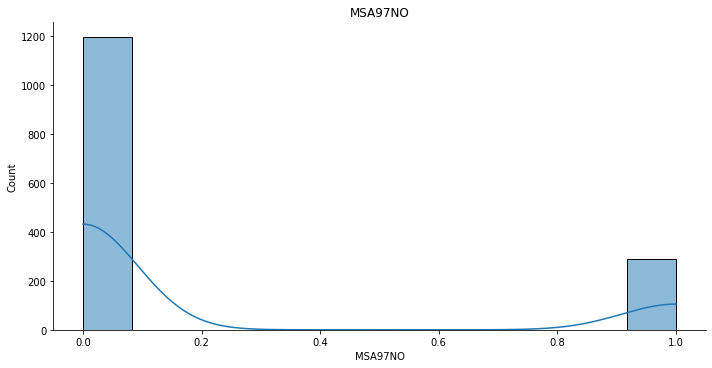

<Figure size 1152x288 with 0 Axes>

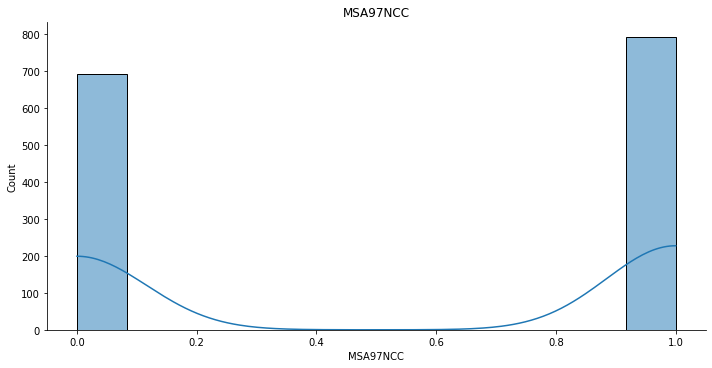

<Figure size 1152x288 with 0 Axes>

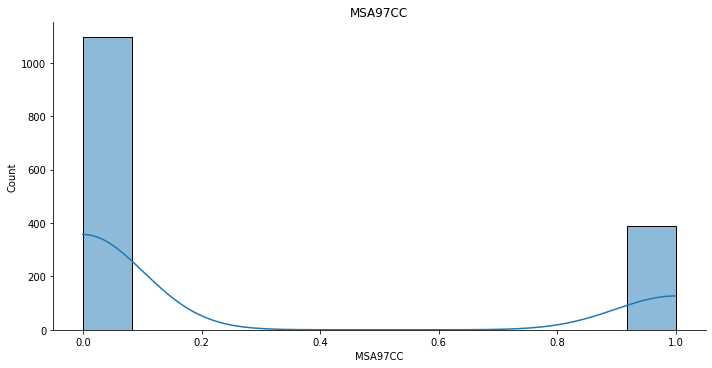

<Figure size 1152x288 with 0 Axes>

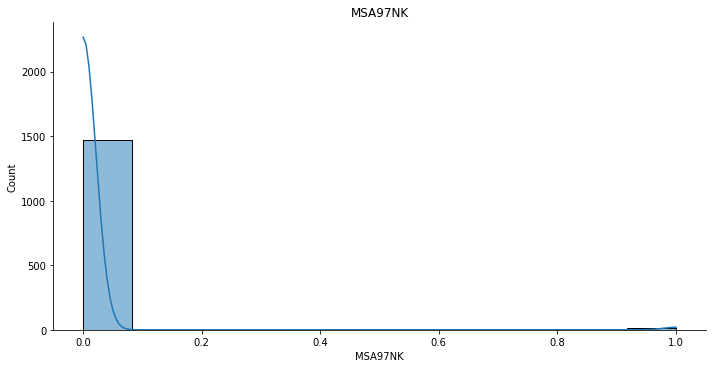

<Figure size 1152x288 with 0 Axes>

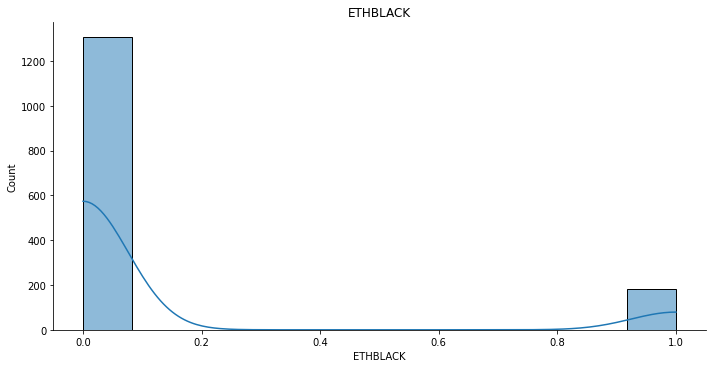

<Figure size 1152x288 with 0 Axes>

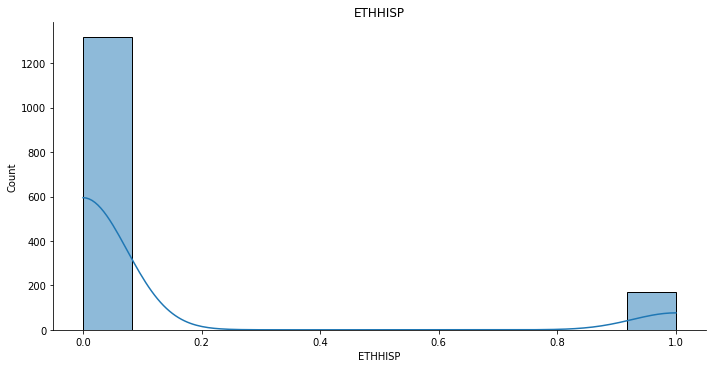

<Figure size 1152x288 with 0 Axes>

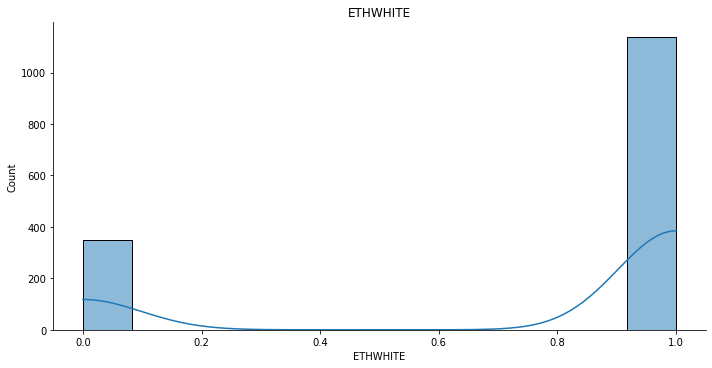

<Figure size 1152x288 with 0 Axes>

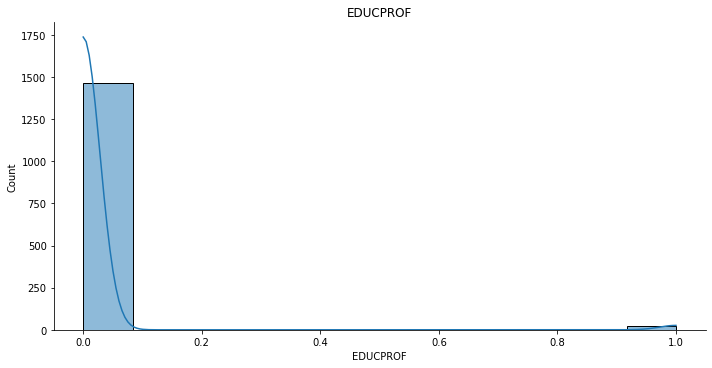

<Figure size 1152x288 with 0 Axes>

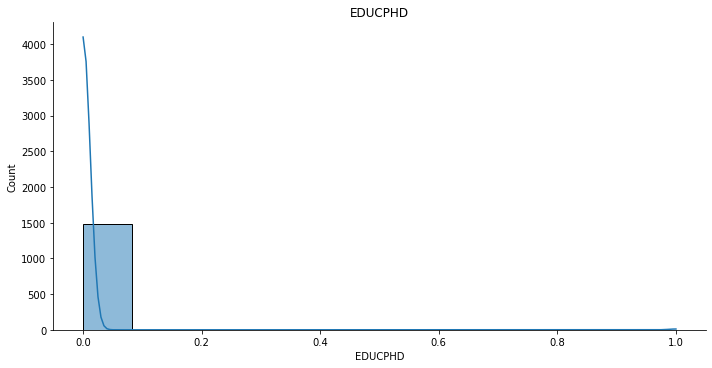

<Figure size 1152x288 with 0 Axes>

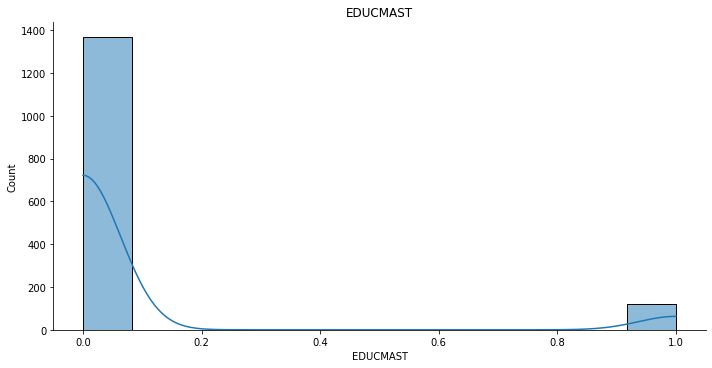

<Figure size 1152x288 with 0 Axes>

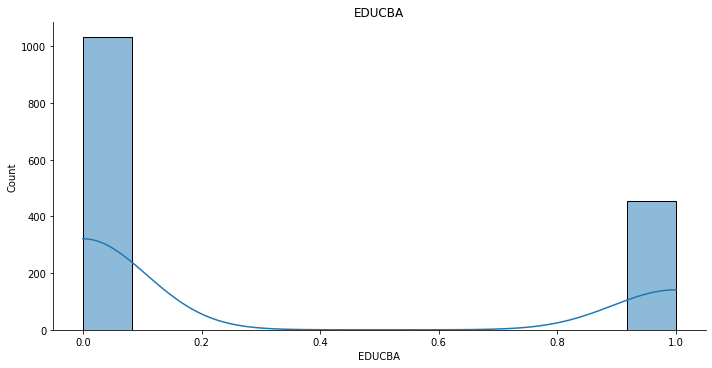

<Figure size 1152x288 with 0 Axes>

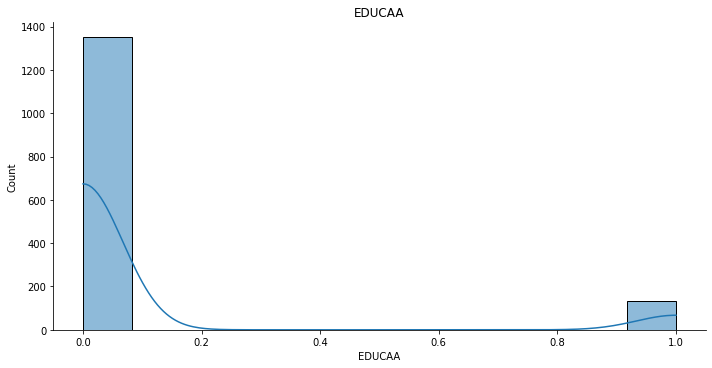

<Figure size 1152x288 with 0 Axes>

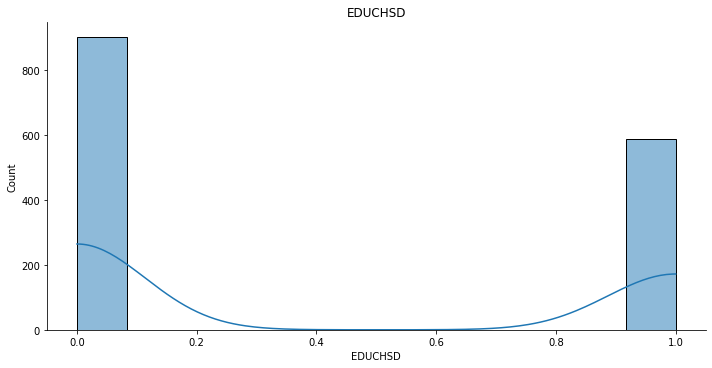

<Figure size 1152x288 with 0 Axes>

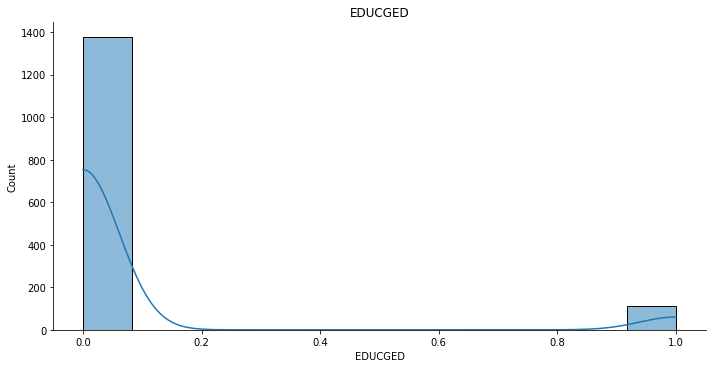

<Figure size 1152x288 with 0 Axes>

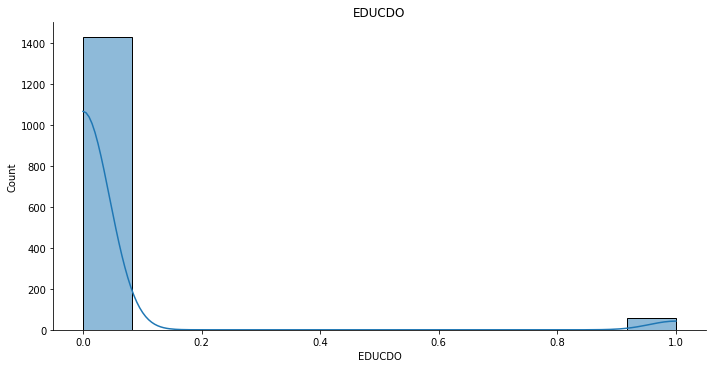

<Figure size 1152x288 with 0 Axes>

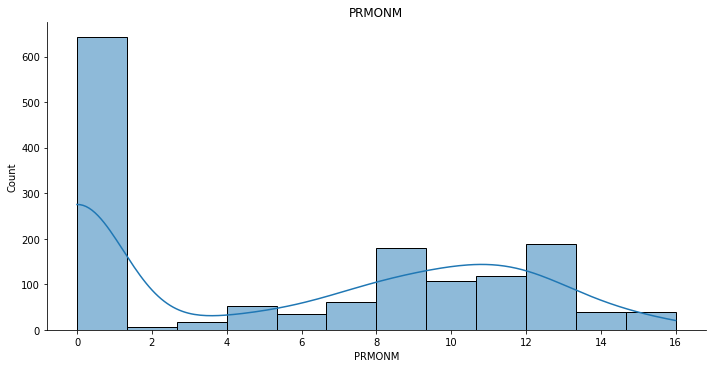

<Figure size 1152x288 with 0 Axes>

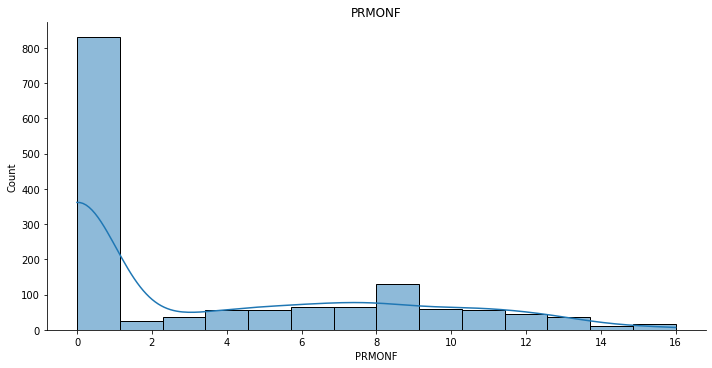

<Figure size 1152x288 with 0 Axes>

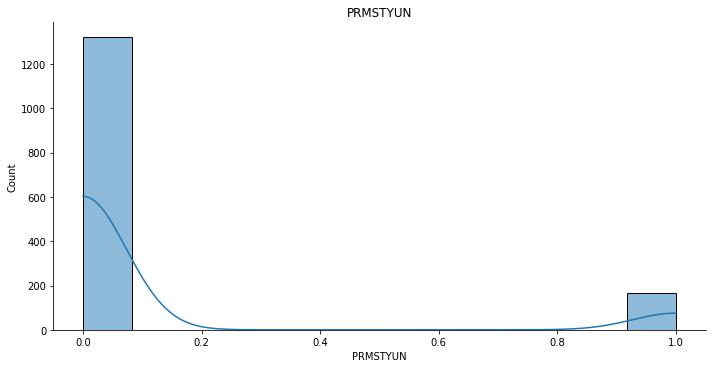

<Figure size 1152x288 with 0 Axes>

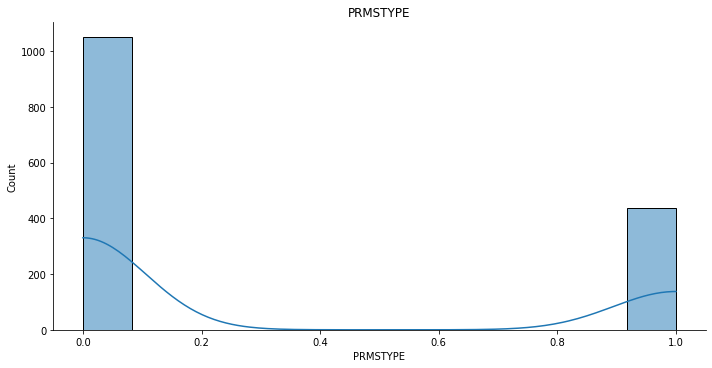

<Figure size 1152x288 with 0 Axes>

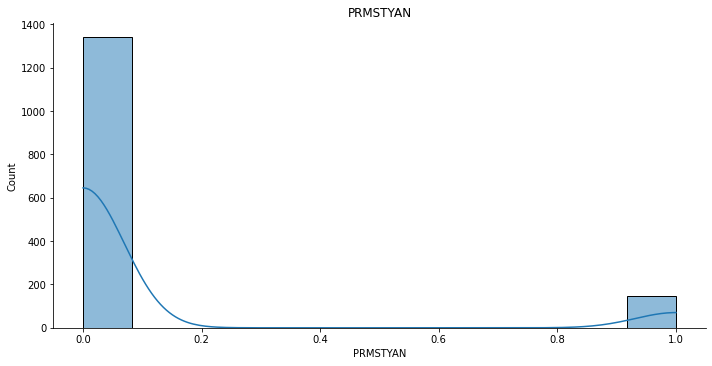

<Figure size 1152x288 with 0 Axes>

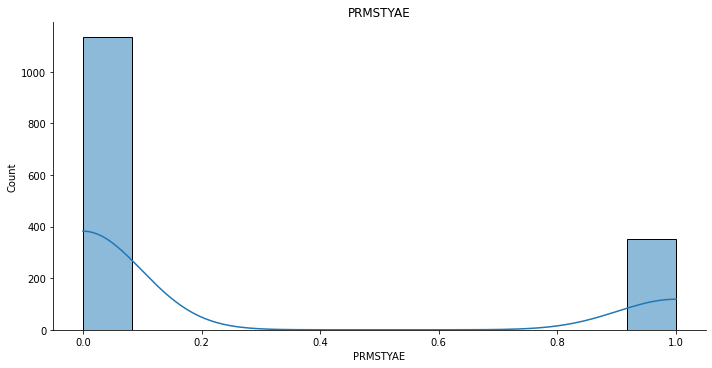

<Figure size 1152x288 with 0 Axes>

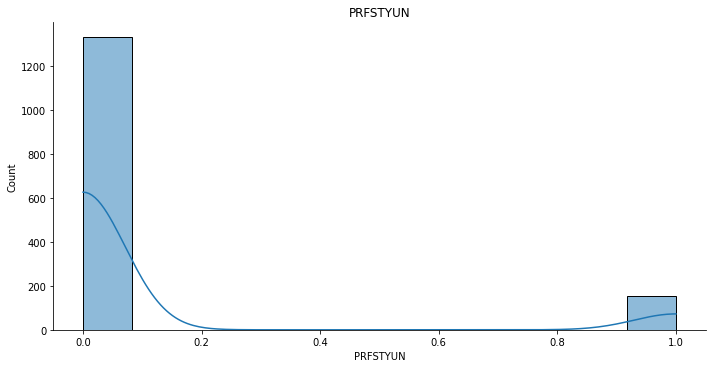

<Figure size 1152x288 with 0 Axes>

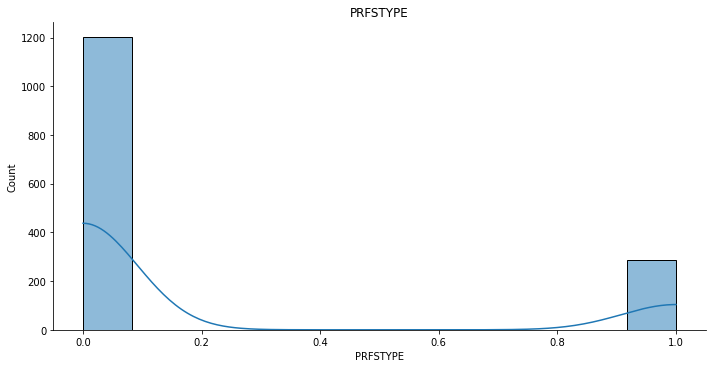

<Figure size 1152x288 with 0 Axes>

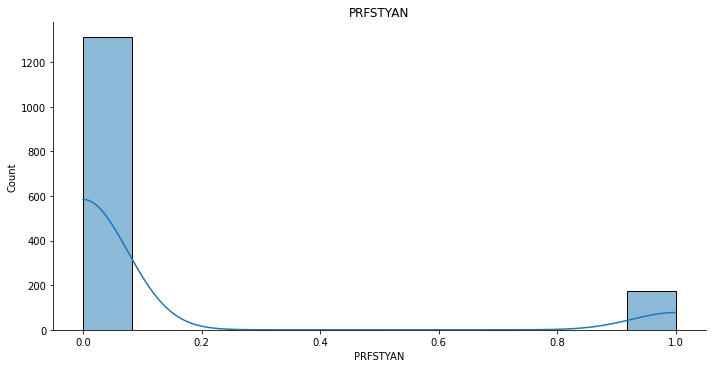

<Figure size 1152x288 with 0 Axes>

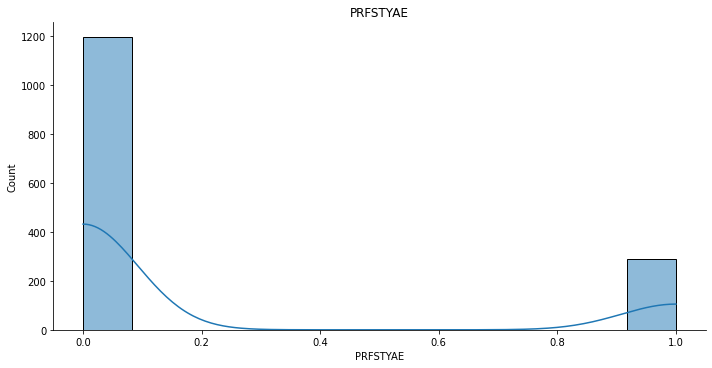

<Figure size 1152x288 with 0 Axes>

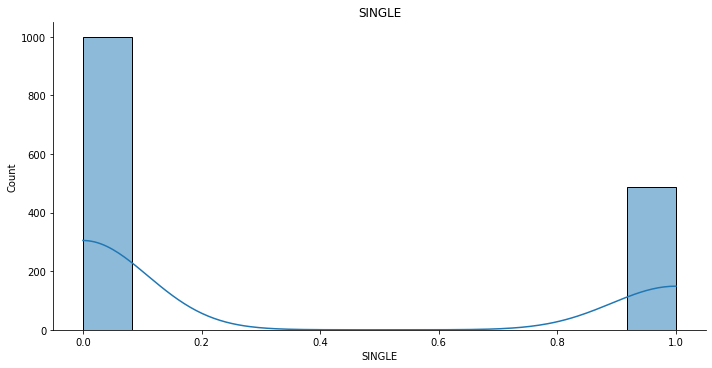

<Figure size 1152x288 with 0 Axes>

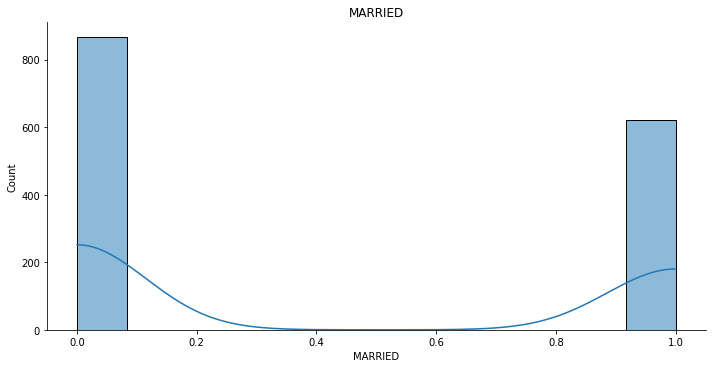

<Figure size 1152x288 with 0 Axes>

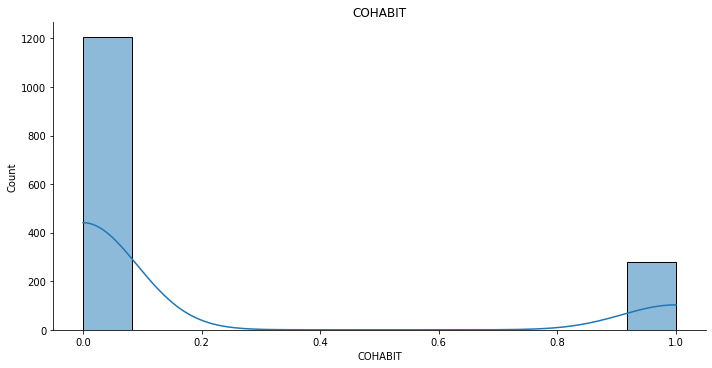

<Figure size 1152x288 with 0 Axes>

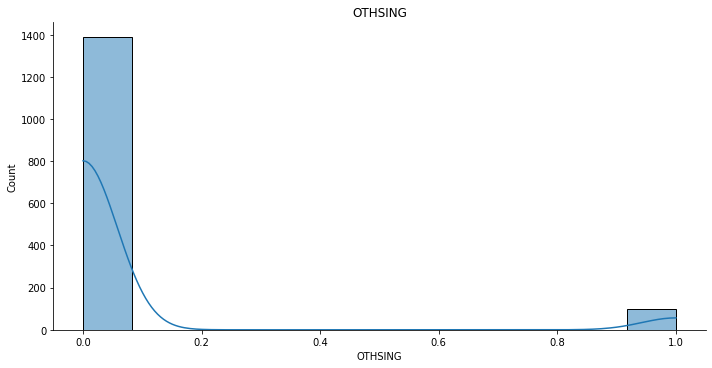

<Figure size 1152x288 with 0 Axes>

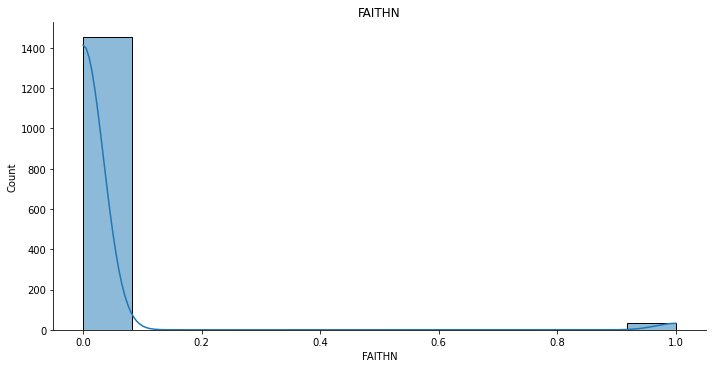

<Figure size 1152x288 with 0 Axes>

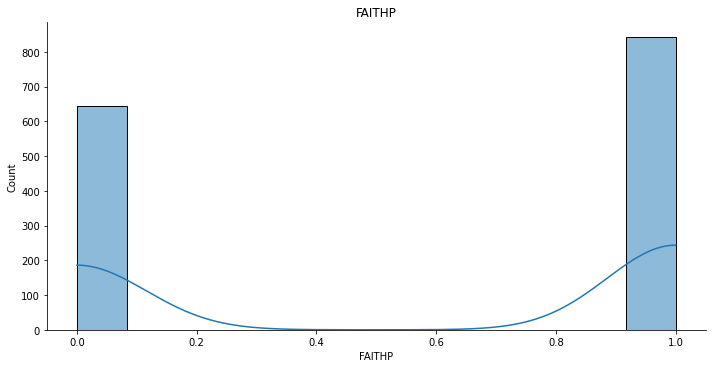

<Figure size 1152x288 with 0 Axes>

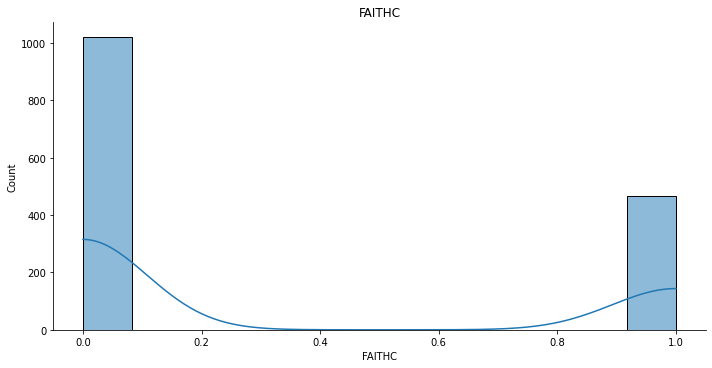

<Figure size 1152x288 with 0 Axes>

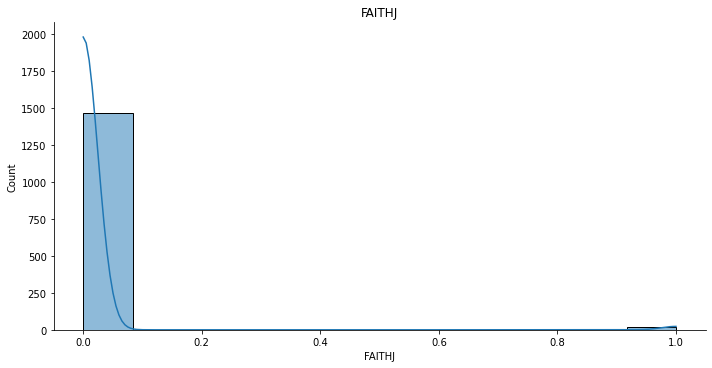

<Figure size 1152x288 with 0 Axes>

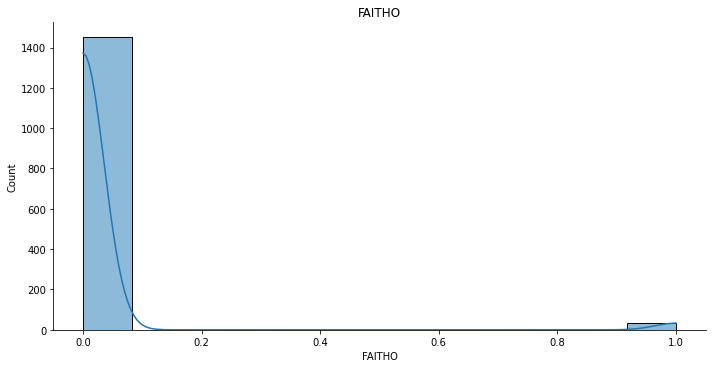

<Figure size 1152x288 with 0 Axes>

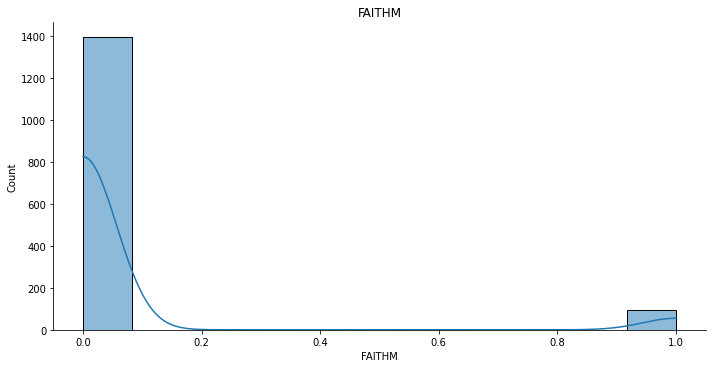

<Figure size 1152x288 with 0 Axes>

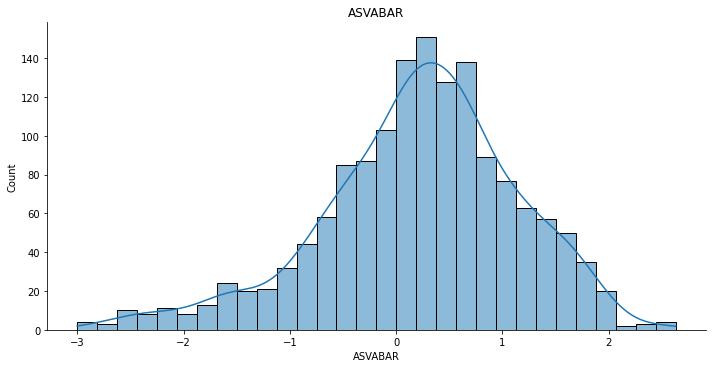

<Figure size 1152x288 with 0 Axes>

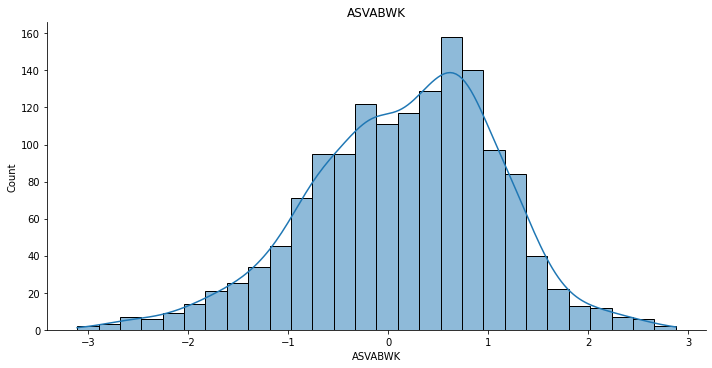

<Figure size 1152x288 with 0 Axes>

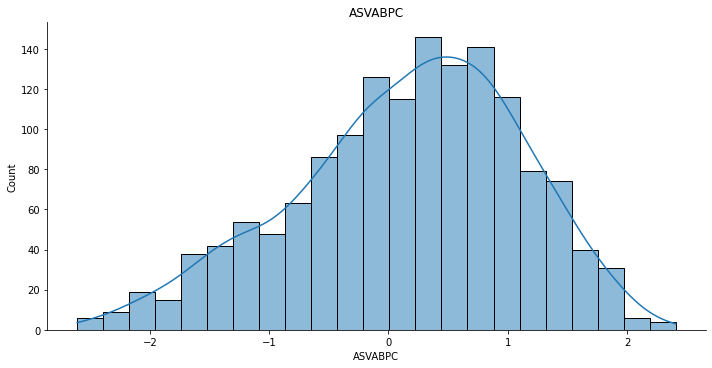

<Figure size 1152x288 with 0 Axes>

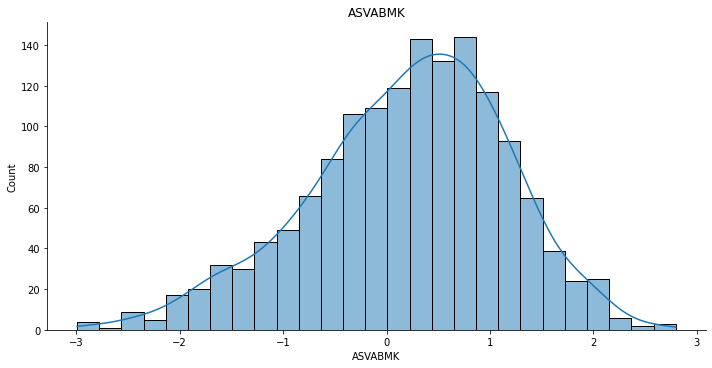

<Figure size 1152x288 with 0 Axes>

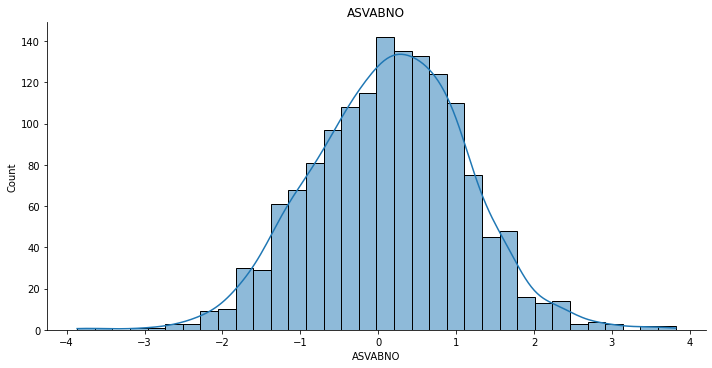

<Figure size 1152x288 with 0 Axes>

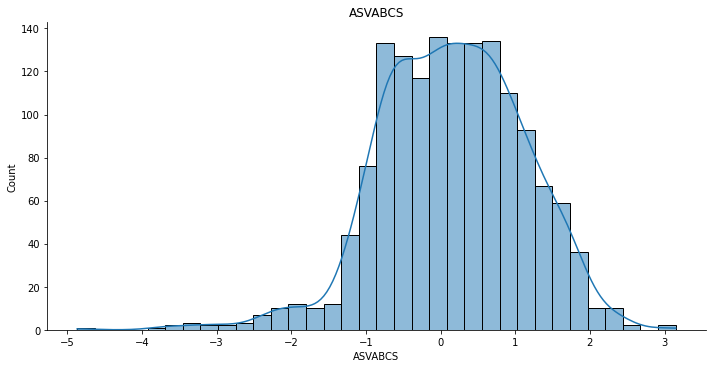

<Figure size 1152x288 with 0 Axes>

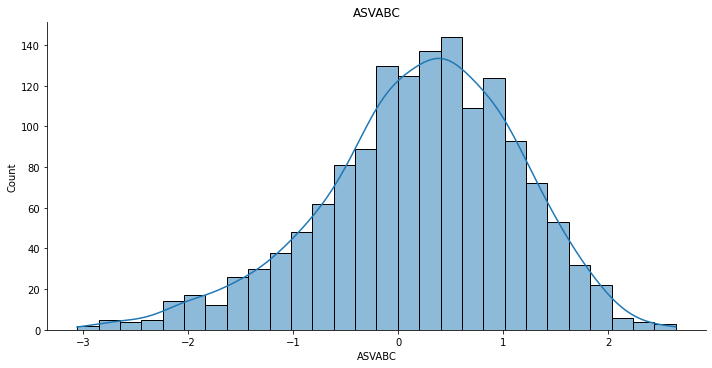

<Figure size 1152x288 with 0 Axes>

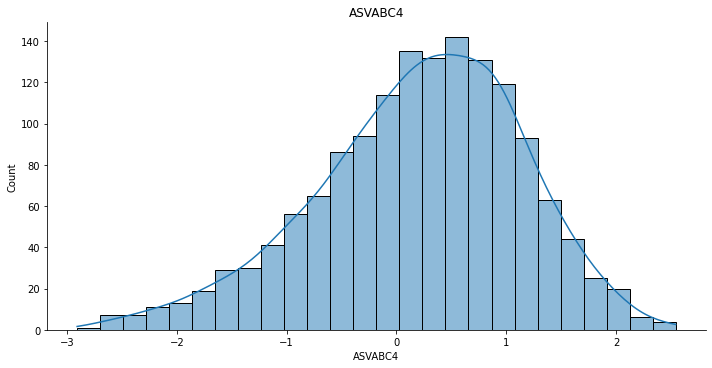

<Figure size 1152x288 with 0 Axes>

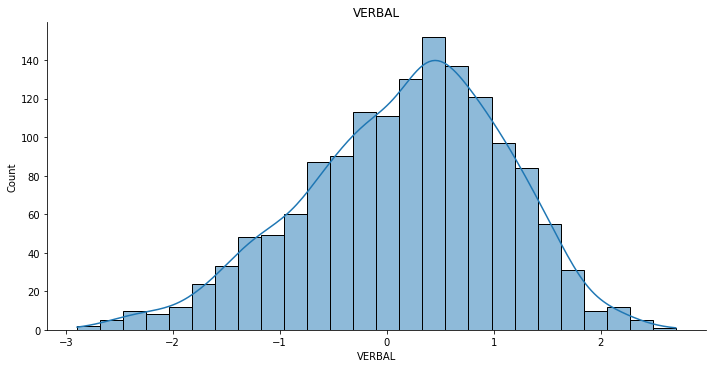

<Figure size 1152x288 with 0 Axes>

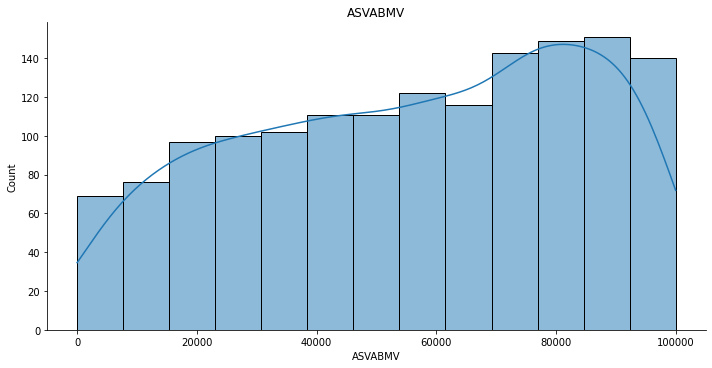

<Figure size 1152x288 with 0 Axes>

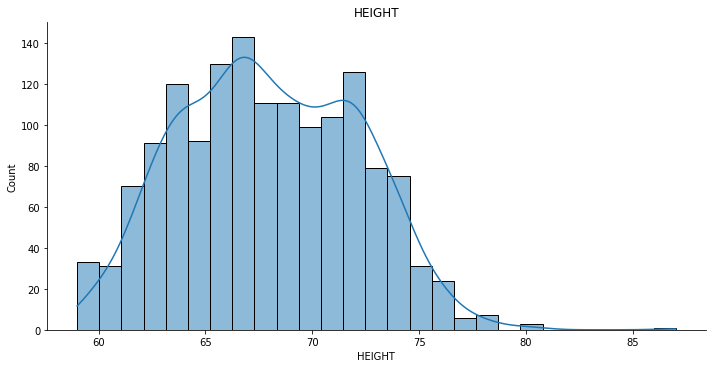

<Figure size 1152x288 with 0 Axes>

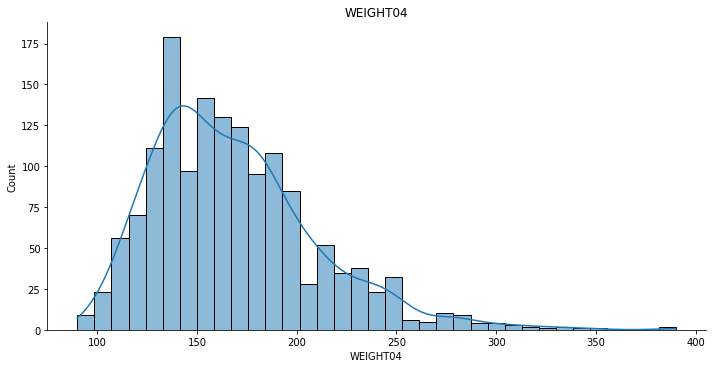

<Figure size 1152x288 with 0 Axes>

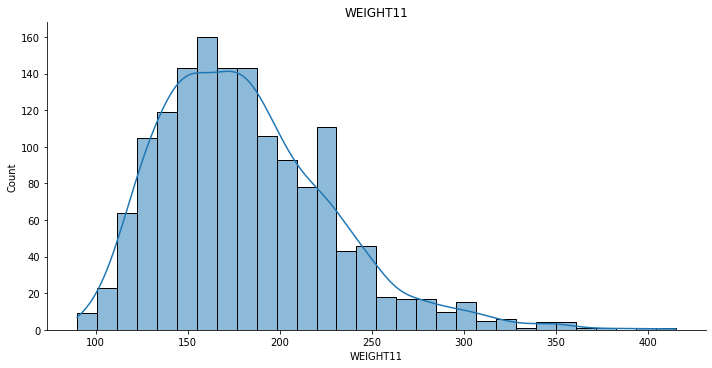

<Figure size 1152x288 with 0 Axes>

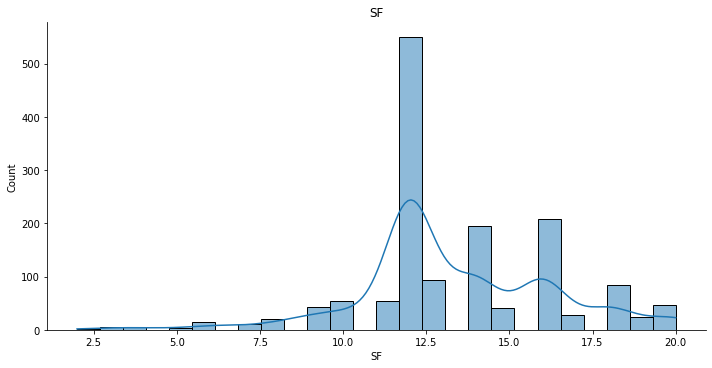

<Figure size 1152x288 with 0 Axes>

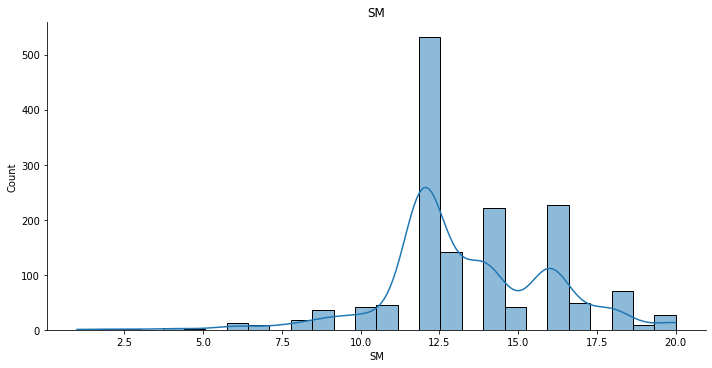

<Figure size 1152x288 with 0 Axes>

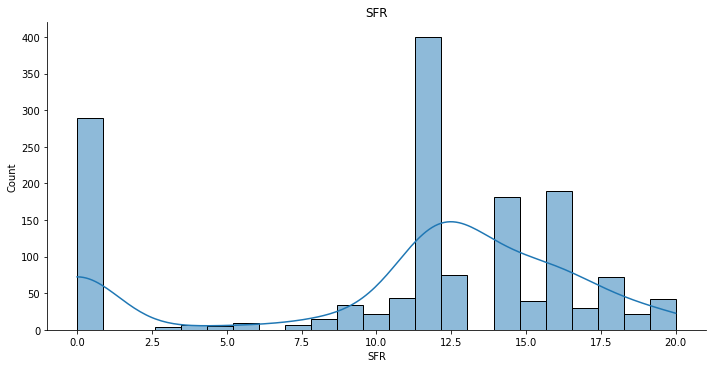

<Figure size 1152x288 with 0 Axes>

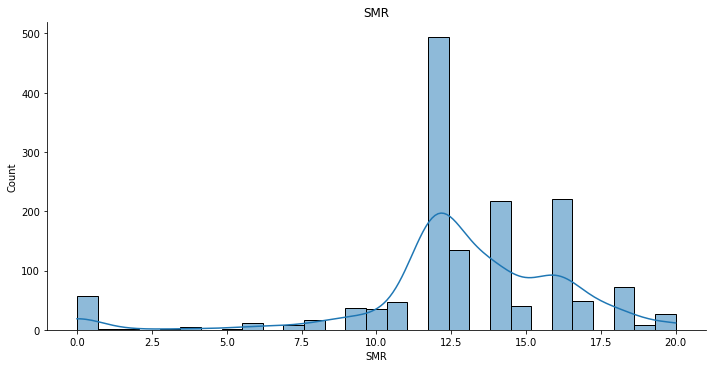

<Figure size 1152x288 with 0 Axes>

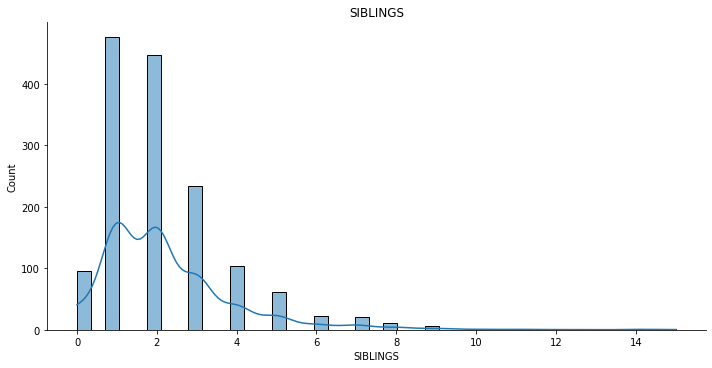

<Figure size 1152x288 with 0 Axes>

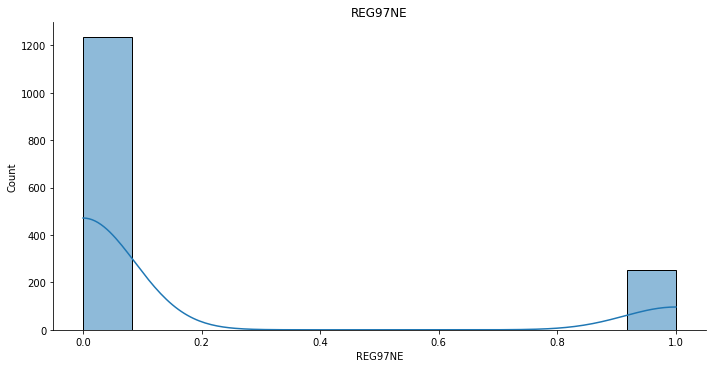

<Figure size 1152x288 with 0 Axes>

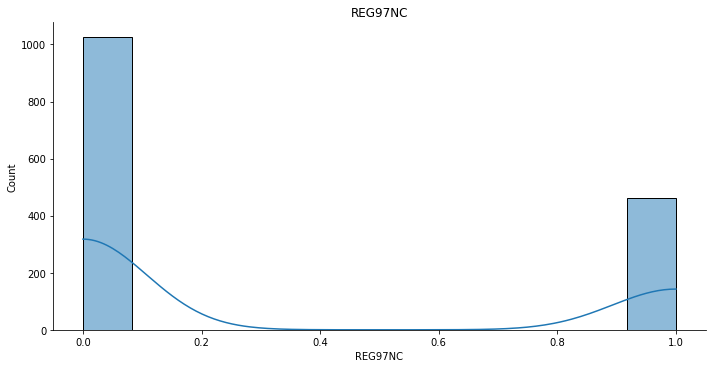

<Figure size 1152x288 with 0 Axes>

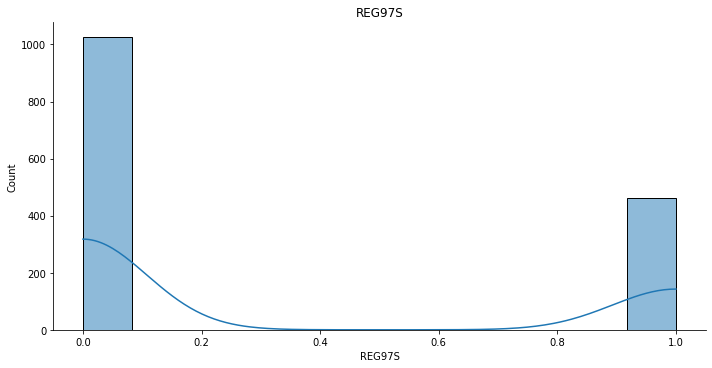

<Figure size 1152x288 with 0 Axes>

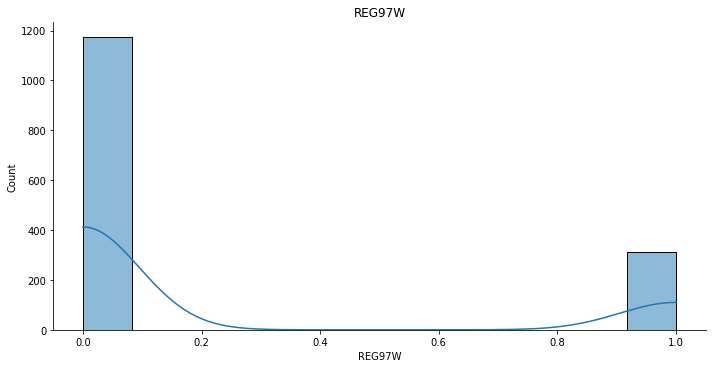

<Figure size 1152x288 with 0 Axes>

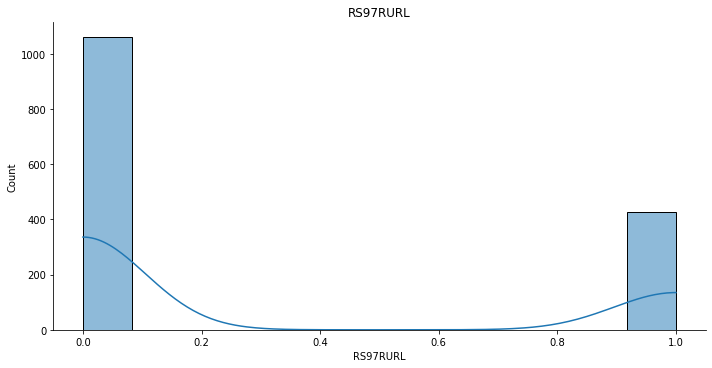

<Figure size 1152x288 with 0 Axes>

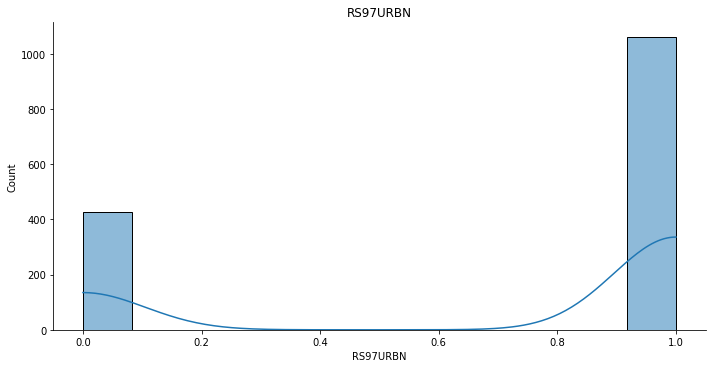

<Figure size 1152x288 with 0 Axes>

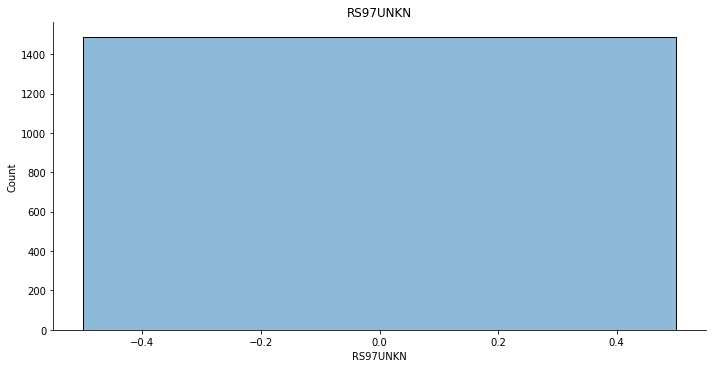

<Figure size 1152x288 with 0 Axes>

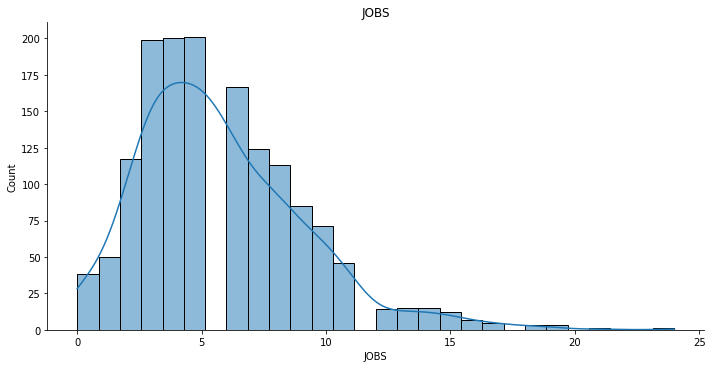

<Figure size 1152x288 with 0 Axes>

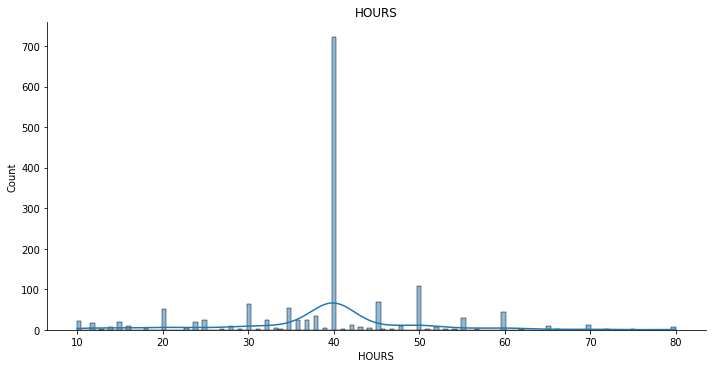

<Figure size 1152x288 with 0 Axes>

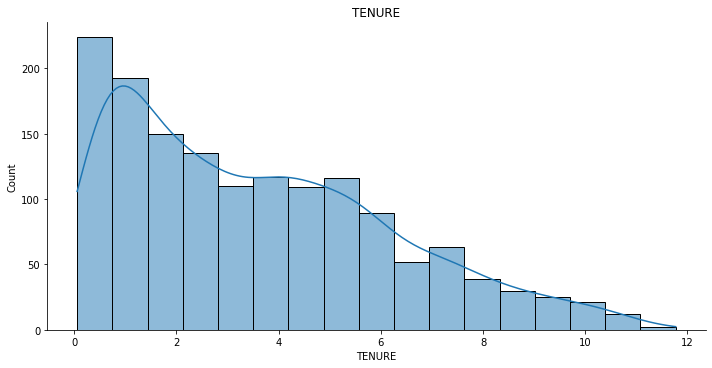

<Figure size 1152x288 with 0 Axes>

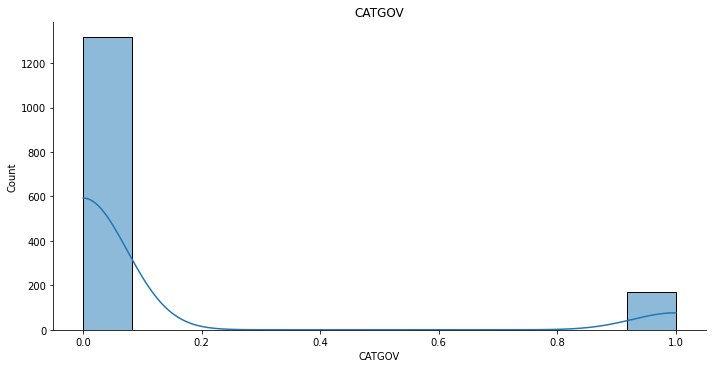

<Figure size 1152x288 with 0 Axes>

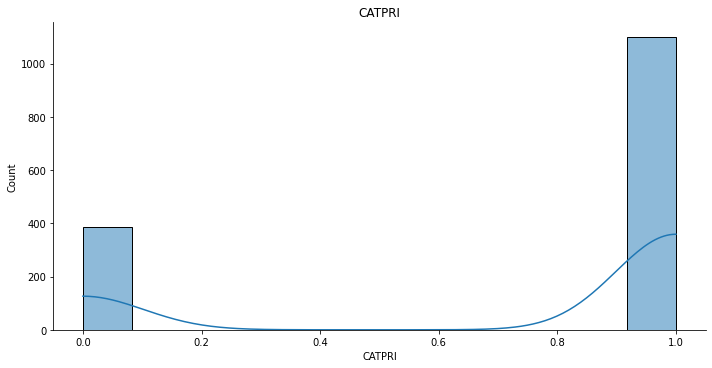

<Figure size 1152x288 with 0 Axes>

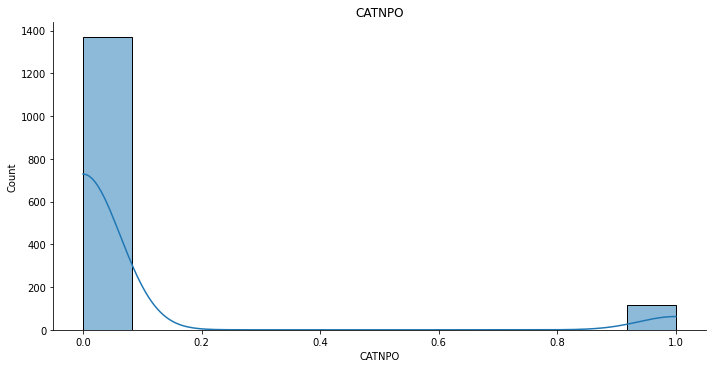

<Figure size 1152x288 with 0 Axes>

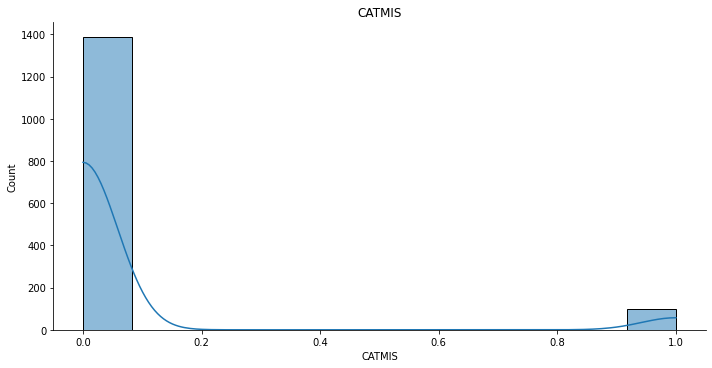

<Figure size 1152x288 with 0 Axes>

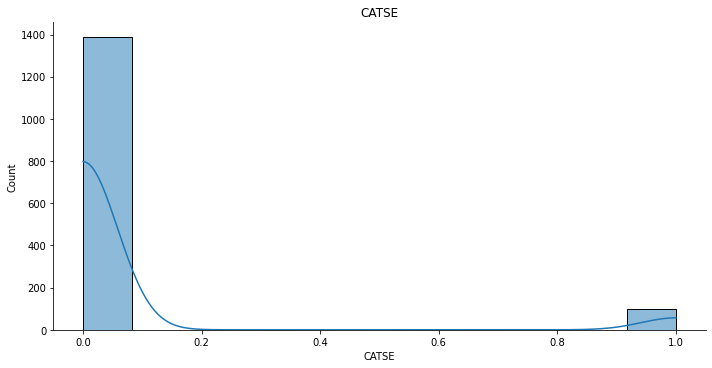

<Figure size 1152x288 with 0 Axes>

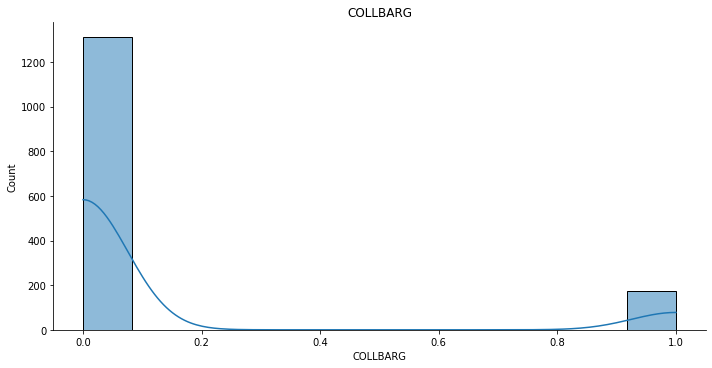

<Figure size 1152x288 with 0 Axes>

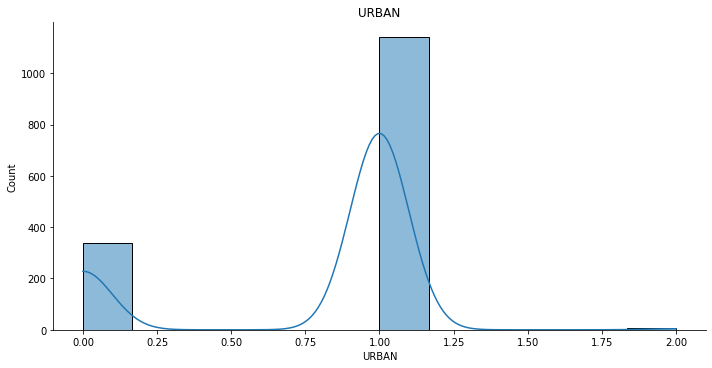

<Figure size 1152x288 with 0 Axes>

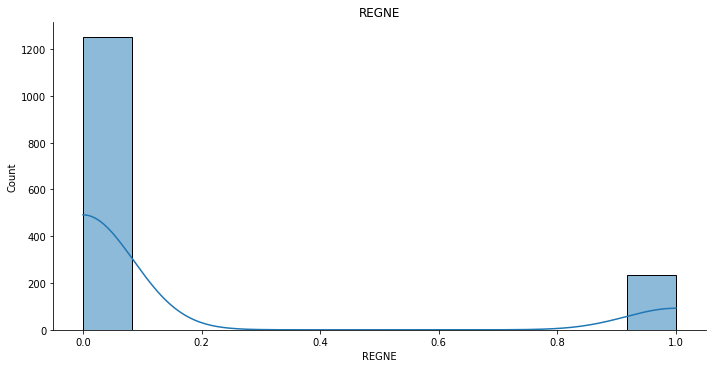

<Figure size 1152x288 with 0 Axes>

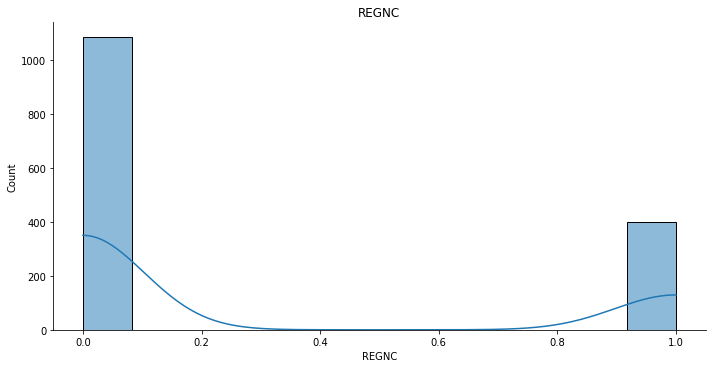

<Figure size 1152x288 with 0 Axes>

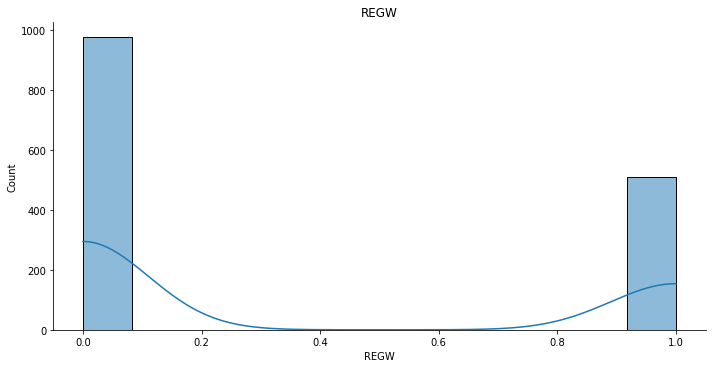

<Figure size 1152x288 with 0 Axes>

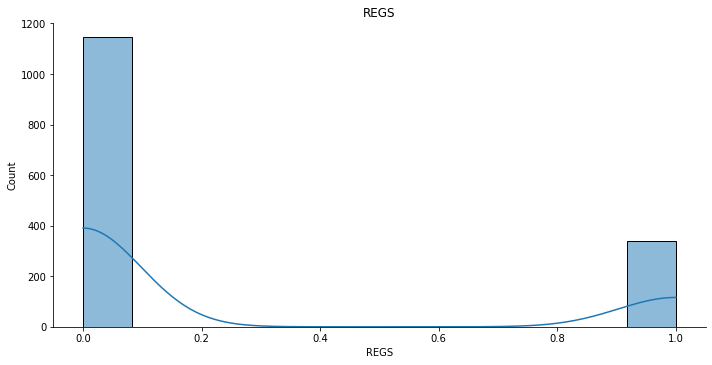

<Figure size 1152x288 with 0 Axes>

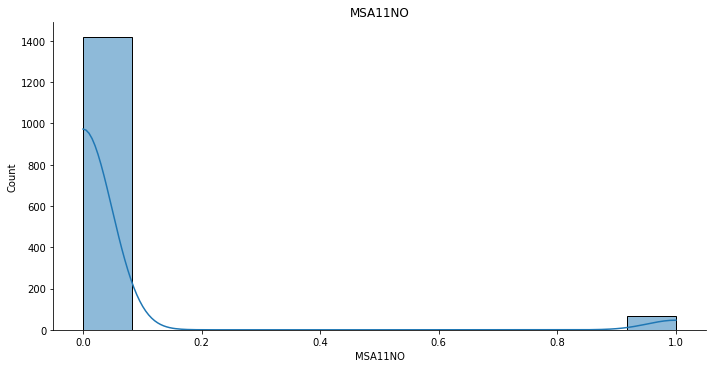

<Figure size 1152x288 with 0 Axes>

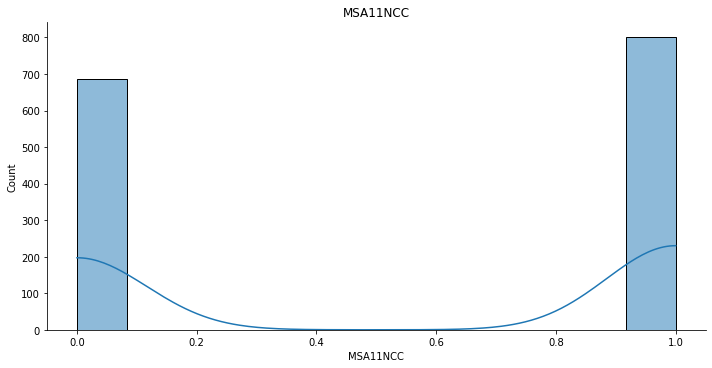

<Figure size 1152x288 with 0 Axes>

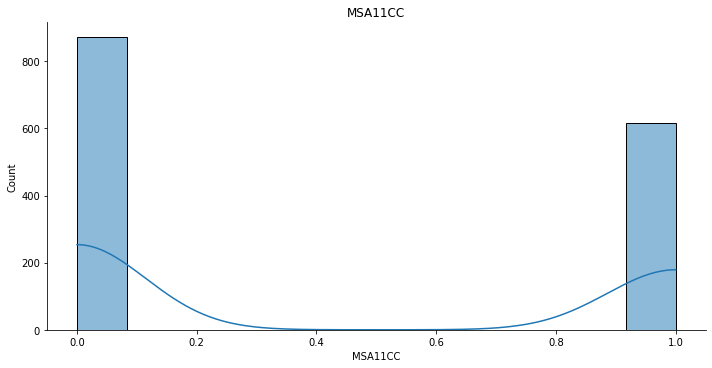

<Figure size 1152x288 with 0 Axes>

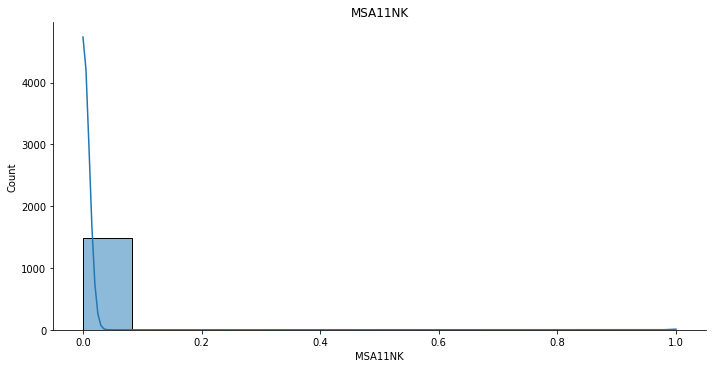

<Figure size 1152x288 with 0 Axes>

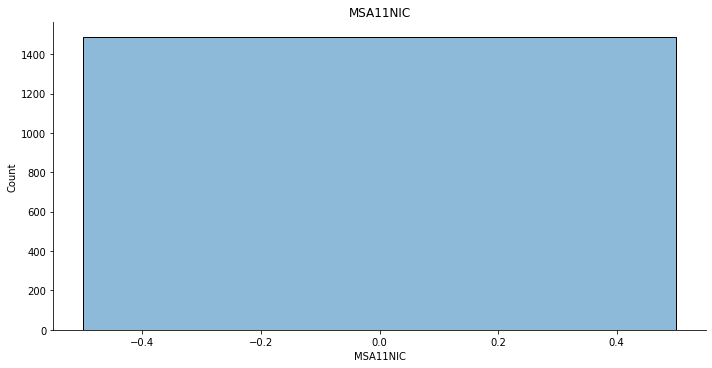

In [ ]:
# plot distributions of features, countplot if object, displot if numeric
for feat in data.columns:
  plt.figure(figsize=(16,4))
  if data[feat].dtype == 'object':
    sns.countplot(data=data, x=feat) # for countplot must use data=
  else:
    sns.displot(data, 
                x=feat, 
                aspect=2,
                kde=True)
  plt.title(feat)
  plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [ ]:
#Note that by default, .drop() does not operate inplace; 
#despite the ominous name, df is unharmed by this process.

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(data, columns=['S'])
 
# Response Variable or Target
y = pd.DataFrame(data, columns=['EARNINGS']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) # train test split

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [ ]:
regression = LinearRegression()

<font color="#FFA035">Now it's time to get to work and run the calculations:</font>

In [ ]:
# Find the best-fit line
regression.fit(X_train, y_train)
rsquared = regression.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.081


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

<font color="#FFA035">That's it. Now we can look at the values of theta-one and theta-zero from the equation above.</font>

In [ ]:
#Theta zero
intercept = regression.intercept_
intercept

array([1.02890741])

The value for the intercept term in this model is 1.028. This would mean the hourly earnings for hour is $1.028 when the Years of schooling are equal to zero.

In [ ]:
#Theta one
coefs = regression.coef_
df_score = pd.DataFrame(coefs.reshape(-1, len(coefs)), columns=['S'])
df_score

,S
0,1.22


In [ ]:
# Dollars for having an additional year of schooling
premium = df_score['S'][0]  # i.e., ~3.11 * 1000
print(f'Extra dollars to earn for an additional year of schooling: ${premium:.4}')

Extra dollars to earn for an additional year of schooling: $1.219


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [ ]:
predicted_values = regression.predict(X_train)
residuals = (y_train - predicted_values)

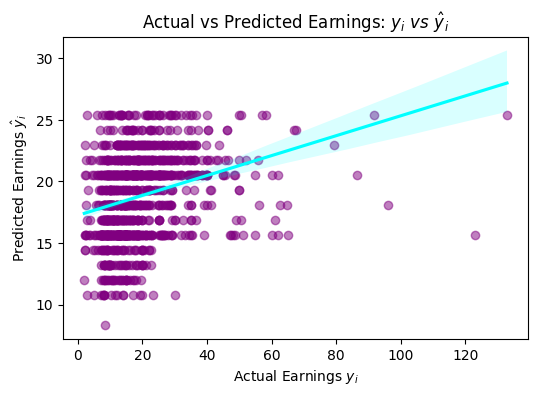

In [ ]:
plt.figure(figsize=(6,4), dpi=100)
ax = sns.regplot(x=y_train, 
          y=predicted_values,
          scatter_kws = {'alpha': 0.5, 
                          'color': 'purple'},
          line_kws = {'color': 'cyan'})

ax.set(ylabel=r'Predicted Earnings $\haty_i$',
      xlabel='Actual Earnings $y_i$')
ax.set_title(r'Actual vs Predicted Earnings: $y_i\ vs \ \haty_i$') 
 
plt.show()

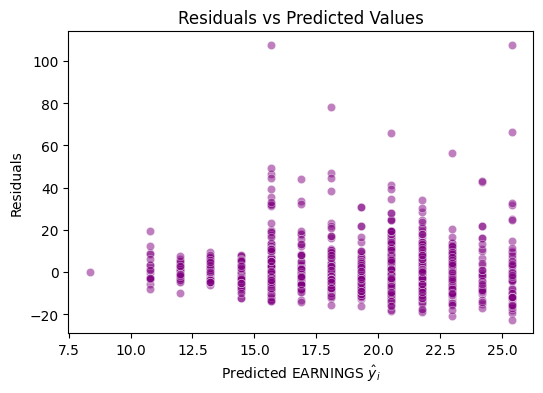

In [ ]:
plt.figure(figsize=(6,4), dpi=100)
ax = sns.scatterplot(x=predicted_values.reshape(-1), 
                     y=residuals.EARNINGS.values,
                     color='purple',
                     alpha=0.5)

ax.set(ylabel='Residuals',
      xlabel=r'Predicted EARNINGS $\haty_i$') 
ax.set_title(r'Residuals vs Predicted Values') 
 
plt.show()


Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like: 

<img src=https://i.imgur.com/7QBqDtO.png height=400>

Let's calculate the mean and the skewness of the residuals. 


In [ ]:
# Calculate the mean
res_mean = round(residuals.EARNINGS.mean(), 1)
print(f'Mean of Residuals: {res_mean}')
# Calculate the skewness
res_skew = round(skew(residuals.EARNINGS, axis=0, bias=True), 2)
print(f'Skewness of Residuals: {res_skew}')

Mean of Residuals: 0.0
Skewness of Residuals: 2.99


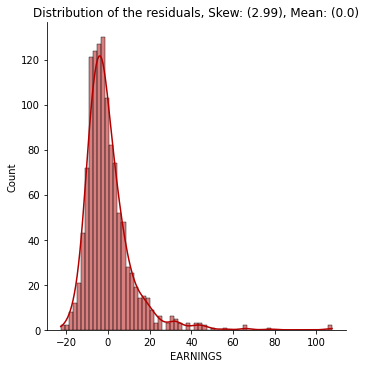

In [ ]:
sns.displot(x=residuals.EARNINGS, kde=True, color='#B20000')
plt.title(f'Distribution of the residuals, Skew: ({res_skew}), Mean: ({res_mean})')
plt.show()

We see that the residuals have a positive skewness of 2.99. It means that there is an outlier present on the right hand side, thus the curve shifts to the left. Also, the concentration of data points on the left is high.

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [ ]:
# Explanatory Variable(s) or Feature(s)
X_multi = pd.DataFrame(data, columns=['S', 'EXP'])
 
# Response Variable or Target
y_multi = pd.DataFrame(data, columns=['EARNINGS']) 

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=10) # train test split

In [ ]:
multi_regression = LinearRegression()

<font color="#FFA035">Now it's time to get to work and run the calculations:</font>

In [ ]:
# Find the best-fit line
multi_regression.fit(X_train_multi, y_train_multi)
rsquared = multi_regression.score(X_train_multi, y_train_multi)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.12


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

<font color="#FFA035">That's it. Now we can look at the values of theta-one and theta-zero from the equation above.</font>

In [ ]:
#Theta zero
intercept = multi_regression.intercept_
intercept

array([-13.88779211])

The value for the intercept term in this model is 1.028. This would mean the hourly earnings for hour is $1.028 when the Years of schooling are equal to zero.

In [ ]:
#Theta one
coefs_multi = multi_regression.coef_
df_score = pd.DataFrame(coefs_multi, columns=['S', 'EXP'])
df_score

,S,EXP
0,1.79,0.98


In [ ]:
# Dollars for having an additional year of schooling
premium = df_score['S'][0]  # i.e., ~3.11 * 1000
print(f'Extra dollars to earn for an additional year of schooling: ${premium:.4}')

Extra dollars to earn for an additional year of schooling: $1.794


### Analyse the Estimated Values & Regression Residuals

In [ ]:
predicted_values = multi_regression.predict(X_train_multi)
residuals = (y_train_multi - predicted_values)

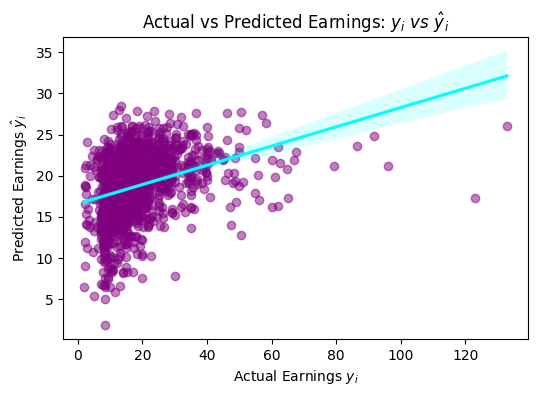

In [ ]:
plt.figure(figsize=(6,4), dpi=100)
ax = sns.regplot(x=y_train_multi, 
          y=predicted_values,
          scatter_kws = {'alpha': 0.5, 
                          'color': 'purple'},
          line_kws = {'color': 'cyan'})

ax.set(ylabel=r'Predicted Earnings $\haty_i$',
      xlabel='Actual Earnings $y_i$')
ax.set_title(r'Actual vs Predicted Earnings: $y_i\ vs \ \haty_i$') 
 
plt.show()

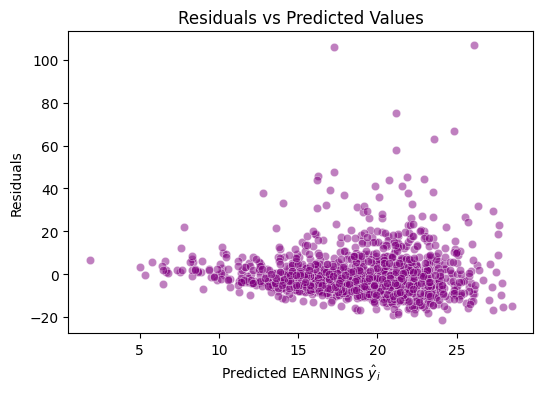

In [ ]:
plt.figure(figsize=(6,4), dpi=100)
ax = sns.scatterplot(x=predicted_values.reshape(-1), 
                     y=residuals.EARNINGS.values,
                     color='purple',
                     alpha=0.5)

ax.set(ylabel='Residuals',
      xlabel=r'Predicted EARNINGS $\haty_i$') 
ax.set_title(r'Residuals vs Predicted Values') 
 
plt.show()

Let's calculate the mean and the skewness of the residuals. 


In [ ]:
# Calculate the mean
res_mean = round(residuals.EARNINGS.mean(), 1)
print(f'Mean of Residuals: {res_mean}')
# Calculate the skewness
res_skew = round(skew(residuals.EARNINGS, axis=0, bias=True), 2)
print(f'Skewness of Residuals: {res_skew}')

Mean of Residuals: 0.0
Skewness of Residuals: 3.02


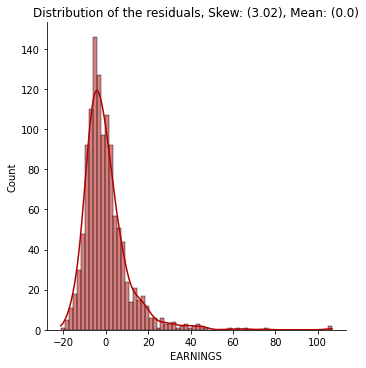

In [ ]:
sns.displot(x=residuals.EARNINGS, kde=True, color='#B20000')
plt.title(f'Distribution of the residuals, Skew: ({res_skew}), Mean: ({res_mean})')
plt.show()

We see that the residuals have a positive skewness of 3.02, higher than prediction with only one feature.

Comparing the r-squared of the two models on the test dataset.

In [ ]:
# R-squared
rearning_r_squared = regression.score(X_test, y_test)
print(f"Original Earning Model Test Data R-squared: {rearning_r_squared:.3}")
# R-squared
multi_rearning_r_squared = multi_regression.score(X_test_multi, y_test_multi)
print(f"Multi feature Earning Test Data R-squared: {multi_rearning_r_squared:.3}")

Original Earning Model Test Data R-squared: 0.0726
Multi feature Earning Test Data R-squared: 0.0873


# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [ ]:
testing = [{'S' : 16, 'EXP' : 5}]
earning_stats = pd.DataFrame.from_dict(testing)
earning_stats

,S,EXP
0,16,5


In [ ]:
estimated_price = multi_regression.predict(earning_stats)[0][0]
print(f'The estimated Earning for someone with a bachelors degree and 5 years of work experience is ${estimated_price}')

The estimated Earning for someone with a bachelors degree and 5 years of work experience is $19.714790361272627


In [ ]:
# Let's compare the result by getting the EARNINGS with S == 16 and EXP == 5.
print (data.query("S == 16 and EXP == 5").EARNINGS)

508    19.00
594    34.62
886    19.71
1769   19.66
Name: EARNINGS, dtype: float64


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

## Split Training & Test Dataset

In [ ]:
#Note that by default, .drop() 
#does not operate inplace; despite the ominous name, df is unharmed by this process. 
X = data.drop('EARNINGS', axis=1) #Features selection.
y = data['EARNINGS'] #Target selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) # train test

## Dimensionality reduction with autoencoders

Before applying dimensionality reduction, it is recommended to standardize our data.

In [ ]:
from sklearn.preprocessing import StandardScaler

std_sclr = StandardScaler()
X_train_std = std_sclr.fit_transform(X_train)
X_test_std = std_sclr.transform(X_test)

In [ ]:
from tensorflow import keras

num_dim = len(X_train.columns)

encoder = keras.models.Sequential([
    keras.layers.Dense(25, activation='selu'),
    keras.layers.Dense(10, activation='selu'),
    keras.layers.Dense(5, activation='selu'),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(10,activation='selu'),
    keras.layers.Dense(25, activation='selu'),
    keras.layers.Dense(num_dim, activation='selu'),
])

autoencoder = keras.models.Sequential([encoder, decoder])

# Compilamos el modelo
autoencoder.compile(
    loss='mse', 
    optimizer=keras.optimizers.SGD(learning_rate=0.1)
)

# El entrenamiento toma los datos originales, los codifica/decodifica 
# en vectores de la misma dimensión.
# Decidimos que debe parar si la métrica del MSE no mejora en 10 épocas. 
autoencoder.fit(
    X_train_std, X_train_std, 
    epochs=100, validation_data=(X_test_std, X_test_std),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

# Ahora vamos a reducir la dimensión del dataset de prueba
# Simplemente llamamos al encoder
X_auto_deep_relu = encoder.predict(X_test_std)

In [ ]:
multi_regression = LinearRegression()

<font color="#FFA035">Now it's time to get to work and run the calculations:</font>

In [ ]:
# Find the best-fit line
multi_regression.fit(X_auto_deep_relu, y_test)
rsquared = multi_regression.score(X_auto_deep_relu, y_test)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.14


As we can see, the linear regressor continues to give unsatisfactory results. Perhaps it is best to implement another type of algorithm for Earnings prediction.